# **Cinemática de un robot planar**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

## Importar librerias

In [ ]:
import numpy as np
from sympy import*
init_printing()

## Se crean variables simbólicas

In [ ]:
## Variables Simbolicas
theta_1 = symbols("theta_1",  real=True)
theta_2 = symbols("theta_2",  real=True)
l_1 = symbols("l_1",  real=True)
l_2 = symbols("l_2",  real=True)

## Transformación desde el estado 0 al estado 1

In [ ]:
_0H1 = Matrix([[cos(theta_1), -sin(theta_1), 0, 0], [sin(theta_1), cos(theta_1), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [ ]:
_0H1


⎡cos(θ₁)  -sin(θ₁)  0  0⎤
⎢                       ⎥
⎢sin(θ₁)  cos(θ₁)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

## Transformación desde el estado 1 al estado 2

In [ ]:
_1H2 = Matrix([[1, 0, 0, l_1], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [ ]:
_1H2

⎡1  0  0  l₁⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

## Transformación desde el estado 2 al estado 3

In [ ]:
_2H3 = Matrix([[cos(theta_2), -sin(theta_2), 0, 0], [sin(theta_2), cos(theta_2), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [ ]:
_2H3

⎡cos(θ₂)  -sin(θ₂)  0  0⎤
⎢                       ⎥
⎢sin(θ₂)  cos(θ₂)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

## Transformación desde el estado 3 al estado 4

In [ ]:
_3H4 = Matrix([[1, 0, 0, l_2], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [ ]:
_3H4


⎡1  0  0  l₂⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

## Composición de cada estado de la cinemática

In [ ]:
H = simplify(_0H1@_1H2@_2H3@_3H4)

In [ ]:
H

⎡cos(θ₁ + θ₂)  -sin(θ₁ + θ₂)  0  l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)⎤
⎢                                                            ⎥
⎢sin(θ₁ + θ₂)  cos(θ₁ + θ₂)   0  l₁⋅sin(θ₁) + l₂⋅sin(θ₁ + θ₂)⎥
⎢                                                            ⎥
⎢     0              0        1               0              ⎥
⎢                                                            ⎥
⎣     0              0        0               1              ⎦

## Posición del efector final

In [ ]:
P = H[0:2, 3]

In [ ]:
P

⎡l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)⎤
⎢                            ⎥
⎣l₁⋅sin(θ₁) + l₂⋅sin(θ₁ + θ₂)⎦

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def dibujar_brazo_mecanico(theta1, theta2, l1, l2):
  """Función para dibujar un brazo mecanico con 2 grados de libertad.

  Parametros:
    theta1: Angulo de la primera articulacion en radianes.
    theta2: Angulo de la segunda articulacion en radianes.
    l1: Longitud del primer extremo
    l2: Longitud del segundo extremo
  """

  # Calculamos la posición del efector final
  x1 = l1 * np.cos(theta1)
  y1 = l1 * np.sin(theta1)
  x2 = x1 + l2 * np.cos(theta1 + theta2)
  y2 = y1 + l2 * np.sin(theta1 + theta2)

  # Dibujando el brazo con lineas y puntos
  plt.figure(figsize=(6, 6))
  plt.plot([0, x1], [0, y1], 'b-', linewidth=5)  # First link
  plt.plot([x1, x2], [y1, y2], 'b-', linewidth=5)  # Second link
  plt.plot(0, 0, 'ro', markersize=10)  # Base
  plt.plot(x2, y2, 'go', markersize=10)  # End-effector

  # Se dibujan los límites y los labels
  plt.xlim([-l1 - l2, l1 + l2])
  plt.ylim([-l1 - l2, l1 + l2])
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Brazo robótico')
  plt.grid(True)
  plt.show()

## **Taller**

*  Dibujar cada estado del anterior brazo robótico
*  Imagine un brazo robótico cuyas extremidades miden 2 unidades cada una. Podría este brazo alcanzar cualquier objeto dentro de la cuadricula de 2 x 2? Explique detalladamente su razonamiento

# Dibujar cada estado del anterior brazo robótico

Se calcula la matriz del estado 2 y 3 del brazo para analizarla y realizar el dibujo

In [ ]:
H2 = simplify(_0H1@_1H2)
H2

⎡cos(θ₁)  -sin(θ₁)  0  l₁⋅cos(θ₁)⎤
⎢                                ⎥
⎢sin(θ₁)  cos(θ₁)   0  l₁⋅sin(θ₁)⎥
⎢                                ⎥
⎢   0        0      1      0     ⎥
⎢                                ⎥
⎣   0        0      0      1     ⎦

In [ ]:
H3 = simplify(_0H1@_1H2@_2H3)
H3

⎡cos(θ₁ + θ₂)  -sin(θ₁ + θ₂)  0  l₁⋅cos(θ₁)⎤
⎢                                          ⎥
⎢sin(θ₁ + θ₂)  cos(θ₁ + θ₂)   0  l₁⋅sin(θ₁)⎥
⎢                                          ⎥
⎢     0              0        1      0     ⎥
⎢                                          ⎥
⎣     0              0        0      1     ⎦

Función para dibujar cada estado del brazo

In [ ]:
def dibujar_estados_brazo(theta1, theta2, l1, l2):
    """Función para dibujar un brazo mecanico con 2 grados de libertad.

    Parametros:
      theta1: Angulo de la primera articulacion en radianes.
      theta2: Angulo de la segunda articulacion en radianes.
      l1: Longitud del primer extremo
      l2: Longitud del segundo extremo
    """
    # Estado 0: Solo la base (sin transformaciones)
    plt.figure(figsize=(6, 6))
    plt.plot(0, 0, 'ro', markersize=10, label='Base')
    plt.xlim([-l1 - l2, l1 + l2])
    plt.ylim([-l1 - l2, l1 + l2])
    plt.title("Estado 0: Solo la base")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Estado 1: Después de _0H1 (rotación θ₁)
    x1_rot = 0  # Aún no hay traslación, solo rotación
    y1_rot = 0
    plt.figure(figsize=(6, 6))
    plt.plot(0, 0, 'ro', markersize=10, label='Base')
    plt.plot([0, 0], [0, 0], 'b-', linewidth=3, label='Eslabón 1 (rotado)')
    plt.xlim([-l1 - l2, l1 + l2])
    plt.ylim([-l1 - l2, l1 + l2])
    plt.title(f"Estado 1: Rotación θ₁ = {np.rad2deg(theta1):.1f}°")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Estado 2: Después de _0H1 @ _1H2 (primer eslabón extendido)
    x1 = l1 * np.cos(theta1)
    y1 = l1 * np.sin(theta1)
    plt.figure(figsize=(6, 6))
    plt.plot(0, 0, 'ro', markersize=10, label='Base')
    plt.plot([0, x1], [0, y1], 'b-', linewidth=3, label='Eslabón 1')
    plt.plot(x1, y1, 'ko', markersize=8, label='Articulación 2')
    plt.xlim([-l1 - l2, l1 + l2])
    plt.ylim([-l1 - l2, l1 + l2])
    plt.title(f"Estado 2: Traslación l₁ = {l1}")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Estado 3: Después de _0H1 @ _1H2 @ _2H3 (rotación θ₂)
    x2_rot = x1  # Aún no se aplica l₂, solo rotación θ₂
    y2_rot = y1
    plt.figure(figsize=(6, 6))
    plt.plot(0, 0, 'ro', markersize=10, label='Base')
    plt.plot([0, x1], [0, y1], 'b-', linewidth=3, label='Eslabón 1')
    plt.plot([x1, x1], [y1, y1], 'g-', linewidth=3, label='Eslabón 2 (rotado)')
    plt.plot(x1, y1, 'ko', markersize=8, label='Articulación 2')
    plt.xlim([-l1 - l2, l1 + l2])
    plt.ylim([-l1 - l2, l1 + l2])
    plt.title(f"Estado 3: Rotación θ₂ = {np.rad2deg(theta2):.1f}°")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Estado 4: Después de _0H1 @ _1H2 @ _2H3 @ _3H4 (posición final)
    x2 = x1 + l2 * np.cos(theta1 + theta2)
    y2 = y1 + l2 * np.sin(theta1 + theta2)
    plt.figure(figsize=(6, 6))
    plt.plot(0, 0, 'ro', markersize=10, label='Base')
    plt.plot([0, x1], [0, y1], 'b-', linewidth=3, label='Eslabón 1')
    plt.plot([x1, x2], [y1, y2], 'g-', linewidth=3, label='Eslabón 2')
    plt.plot(x1, y1, 'ko', markersize=8, label='Articulación 2')
    plt.plot(x2, y2, 'go', markersize=8, label='Efector final')
    plt.xlim([-l1 - l2, l1 + l2])
    plt.ylim([-l1 - l2, l1 + l2])
    plt.title(f"Estado 4: Traslación l₂ = {l2} (Posición final)")
    plt.grid(True)
    plt.legend()
    plt.show()


Ejecucion de la función con los parametros del ejemplo

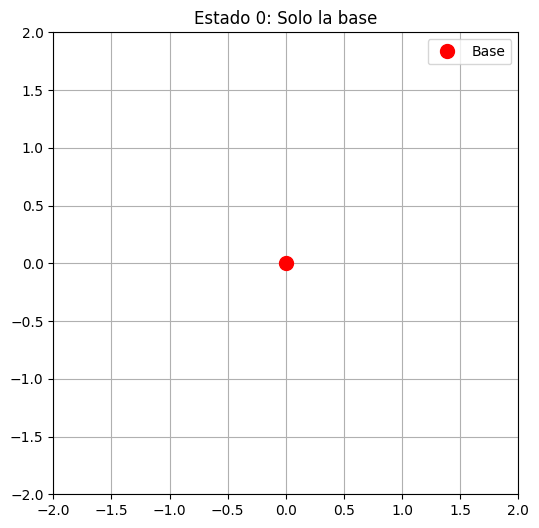

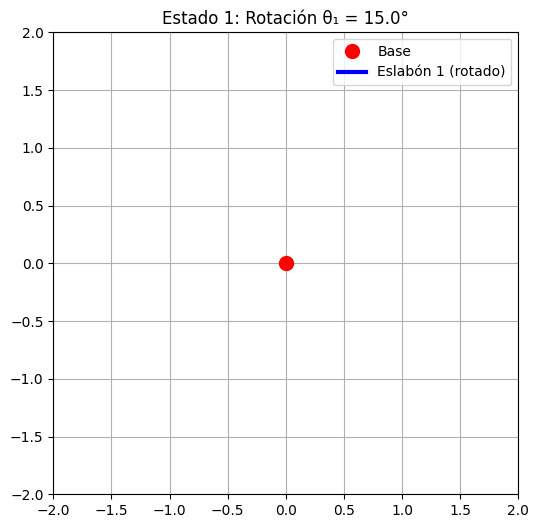

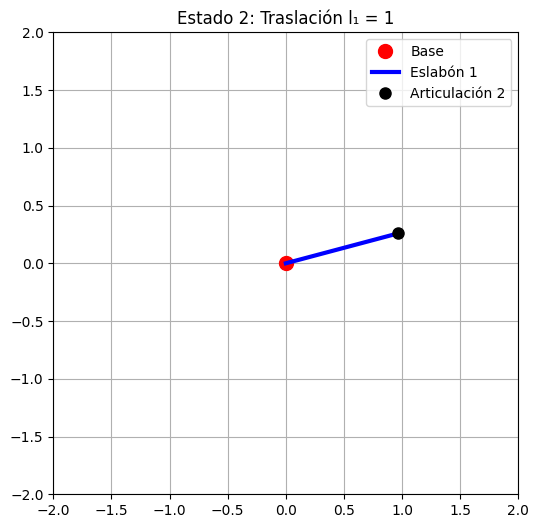

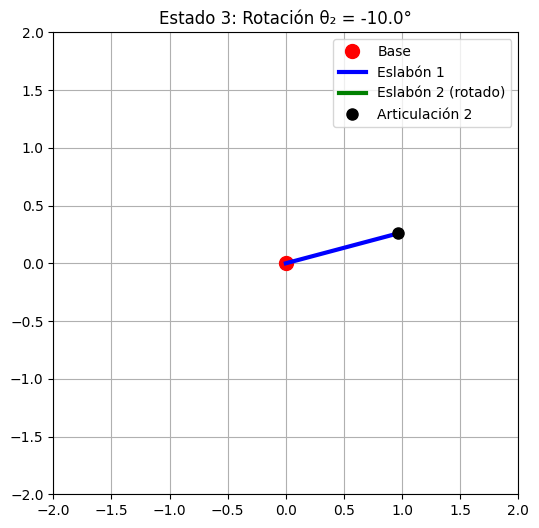

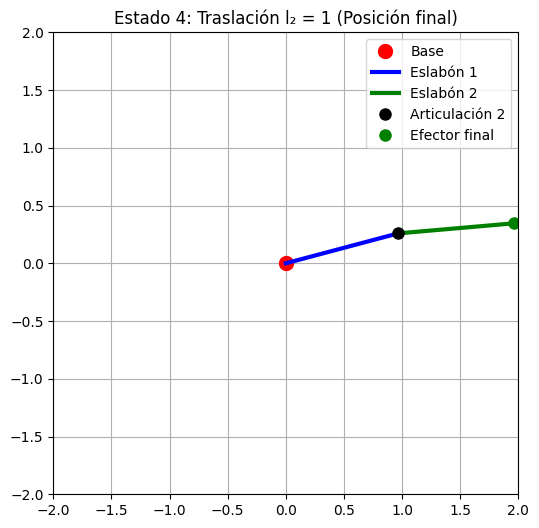

In [ ]:
# Parámetros de ejemplo
theta1 = np.deg2rad(15)  # 15 grados
theta2 = np.deg2rad(-10)  # -10 grados
l1 = 1
l2 = 1

dibujar_estados_brazo(theta1, theta2, l1, l2)

# Ejercicio 2


In [ ]:
def dibujar_brazo_mecanico_for(theta1, theta2, l1, l2):
  """Función para dibujar un brazo mecanico con 2 grados de libertad.

  Parametros:
    theta1: Angulo de la primera articulacion en radianes.
    theta2: Angulo de la segunda articulacion en radianes.
    l1: Longitud del primer extremo
    l2: Longitud del segundo extremo
  """

  # Calculamos la posición del efector final
  x1 = l1 * np.cos(theta1)
  y1 = l1 * np.sin(theta1)
  x2 = x1 + l2 * np.cos(theta1 + theta2)
  y2 = y1 + l2 * np.sin(theta1 + theta2)

  # Dibujando el brazo con lineas y puntos
  plt.figure(figsize=(6, 6))
  plt.plot([0, x1], [0, y1], 'b-', linewidth=5)  # First link
  plt.plot([x1, x2], [y1, y2], 'b-', linewidth=5)  # Second link
  plt.plot(0, 0, 'ro', markersize=10)  # Base
  plt.plot(x2, y2, 'go', markersize=10)  # End-effector

  # Se dibujan los límites y los labels
  plt.xlim([-2, 2])  # Limite del eje x de -2 a 2
  plt.ylim([-2, 2])  # Limite del eje y de -2 a 2
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Brazo robótico')
  plt.grid(True)
  plt.show()

In [ ]:
theta_e1 = np.arange(15, 361, 15)
theta_e2 = np.arange(-15, -361, -15)
l1 = 2
l2 = 2

for i in range(len(theta_e1)):
  for j in range(len(theta_e2)):
    dibujar_brazo_mecanico_for(np.deg2rad(theta_e1[i]), np.deg2rad(theta_e2[j]), l1, l2)